Программа на сегодня:

1. Функции минимума, максимума, скользящее среднее
2. Гистограмма, квантиль
3. Корреляция параметров
4. Автокорреляция, сезонность
5. Тренд
---
ДЗ 2: рассмотреть данные по следующей ссылке изученными методами. Написать отчет, в котором должны содержаться следующие пункты:

1) какие выводы можно сделать по данным,

2) какие методы из изученных применимы, какие не применимы для данного датасета и почему.

**Это ДЗ конкурсное**.

* Критерий оценки: детальность отчета.

* ссылка на данные для ДЗ (источник: [Industrial Production: Electric and gas utilities](https://fred.stlouisfed.org/series/IPG2211A2N)):
* ДЗ сдается в виде ссылки на файл, аналогичный этому, через Google Форму в Telegram чате.

*  **Дедлайн:** 17:00 по МСК

---

Данные взяты с сайта https://rp5.ru/Архив_погоды_в_Москве_(ВДНХ)


Нажимаем кнопку "Выбрать в файл GZ (архив)" и формат файла Excel файлом за интересующий период (с 2015 года). Рядом появляется ссылка "Скачать". Правая кнопка мыши -> Копировать ссылку

Пример команды для скачивания (подставить свою ссылку):

```!wget -O "weather.xls.gz" "http://37.200.66.117/download/files.synop/27/27612.01.01.2015.29.03.2021.1.0.0.ru.utf8.00000000.xls.gz""```

Распаковка архива:

```!gzip -df "weather.xls.gz"```

Ссылка на запись трансляции:
https://live.skillbox.ru/webinars/code/analiz-dannykh-v-data-science-podvodim-itogi280421/




# Инструкция по отправке ДЗ

Схема: Вы выполняете ДЗ в своем файле на Google Диск (можно скопировать этот или создать новый). После чего открываете доступ на чтение по ссылке и отправляете ссылку в Google Форму, которая закреплена в Telegram чате. Файлы без доступа на чтение проверить не получится.





In [ ]:
# Скачивание архива .gz в рабочее окружение
!wget -O "weather.xls.gz" "http://37.9.3.250/download/files.synop/27/27612.01.01.2015.01.01.2021.1.0.0.ru.utf8.00000000.xls.gz"
# Распаковка архива (архив .gz заменится на файл .xls)
!gzip -df "weather.xls.gz"

--2021-04-28 17:21:23--  http://37.9.3.250/download/files.synop/27/27612.01.01.2015.01.01.2021.1.0.0.ru.utf8.00000000.xls.gz
Connecting to 37.9.3.250:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1663119 (1.6M) [application/octet-stream]
Saving to: ‘weather.xls.gz’

weather.xls.gz      100%[===================>]   1.59M   861KB/s    in 1.9s    

2021-04-28 17:21:26 (861 KB/s) - ‘weather.xls.gz’ saved [1663119/1663119]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

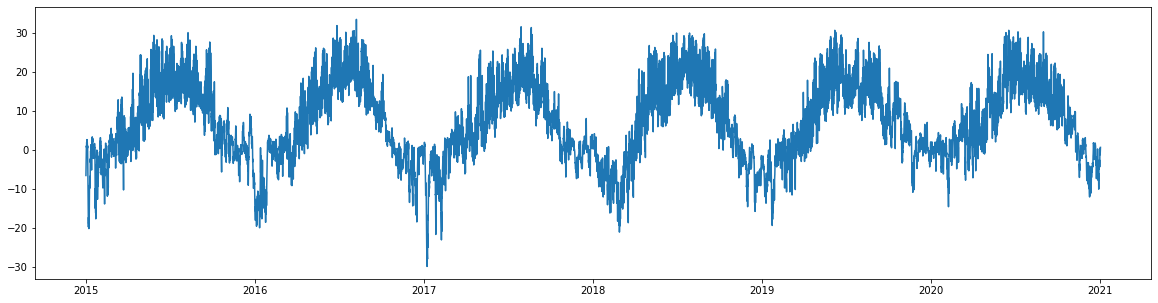

In [ ]:
data = pd.read_excel('weather.xls', skiprows=6)  # удалили первые 6 строк комментариев

data['date'] = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)
data = data.sort_values('date')
data = data.reset_index(drop=True)

plt.figure(figsize=(20, 5))
plt.plot(data['date'], data['T'])

In [ ]:
!wget -O "ipg.xls" "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=IPG2211A2N&scale=left&cosd=1939-01-01&coed=2021-03-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-04-28&revision_date=2021-04-28&nd=1939-01-01"

--2021-04-28 17:21:33--  https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=IPG2211A2N&scale=left&cosd=1939-01-01&coed=2021-03-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-04-28&revision_date=2021-04-28&nd=1939-01-01
Resolving fred.stlouisfed.org (fred.stlouisfed.org)... 104.122.56.134
Connecting to fred.stlouisfed.org (fred.stlouisfed.org)|104.122.56.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56832 (56K) [application/vnd.ms-excel]
Saving to: ‘ipg.xls’

ipg.xls             100%[===================>]  55.50K  --.-KB/s    in 0.04s   

2021-04-28 17:21:34 (1.39 M

In [ ]:
data = pd.read_excel('ipg.xls', skiprows=10)

In [ ]:
data.head(15)

,observation_date,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133
5,1939-06-01,3.5650
6,1939-07-01,3.5650
7,1939-08-01,3.6167
8,1939-09-01,3.7200
9,1939-10-01,3.7200


In [ ]:
data.columns

Index(['observation_date', 'IPG2211A2N'], dtype='object')

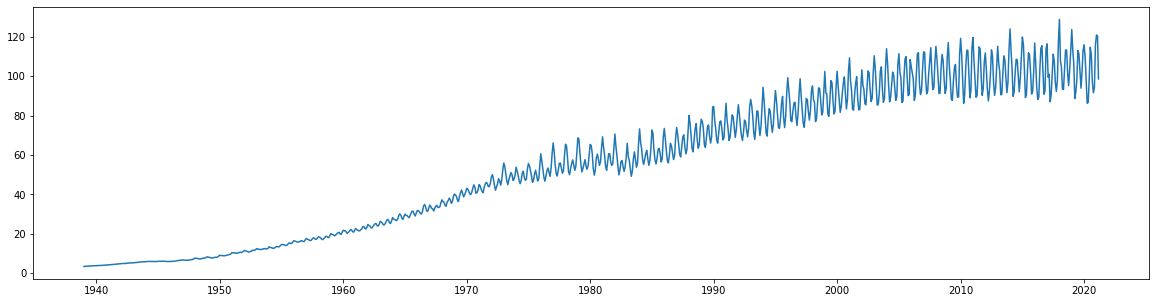

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(data['observation_date'], data['IPG2211A2N'])

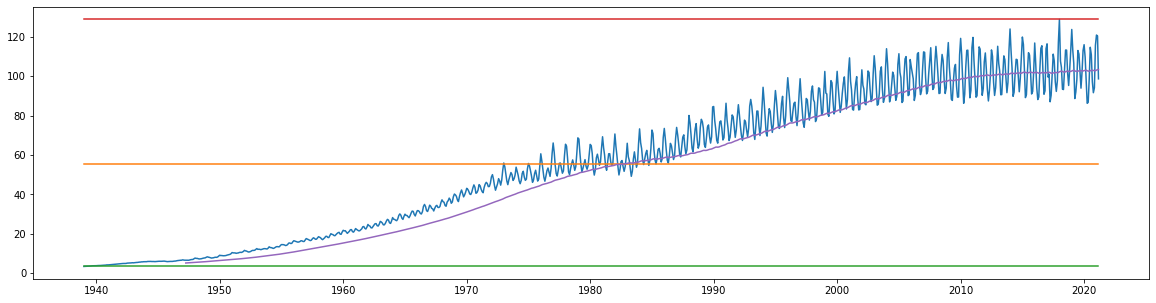

In [ ]:
# 1 уровень разбора - участники строят тренд и применяют все функции, изученные вчера

data['min'] = data['IPG2211A2N'].min()
data['max'] = data['IPG2211A2N'].max()
data['mean'] = data['IPG2211A2N'].mean()
plt.figure(figsize=(20, 5))
plt.plot(data['observation_date'], data['IPG2211A2N'])
plt.plot(data['observation_date'], data['mean'])
plt.plot(data['observation_date'], data['min'])
plt.plot(data['observation_date'], data['max'])
plt.plot(data['observation_date'], data['IPG2211A2N'].rolling(100).mean())

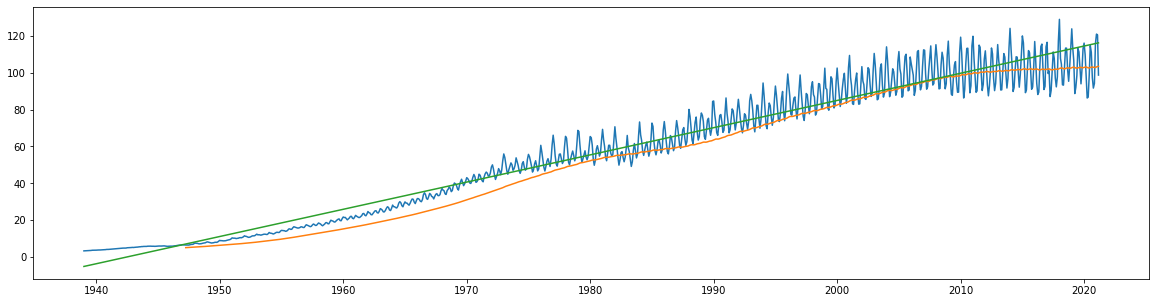

In [ ]:
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(data.index)
y = data['IPG2211A2N']


model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

data['min'] = data['IPG2211A2N'].min()
data['max'] = data['IPG2211A2N'].max()
data['mean'] = data['IPG2211A2N'].mean()
plt.figure(figsize=(20, 5))
plt.plot(data['observation_date'], data['IPG2211A2N'])
# plt.plot(data['observation_date'], data['mean'])
# plt.plot(data['observation_date'], data['min'])
# plt.plot(data['observation_date'], data['max'])
plt.plot(data['observation_date'], data['IPG2211A2N'].rolling(100).mean())
plt.plot(data['observation_date'], trend)

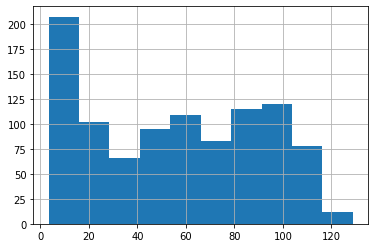

In [ ]:
data['IPG2211A2N'].hist()

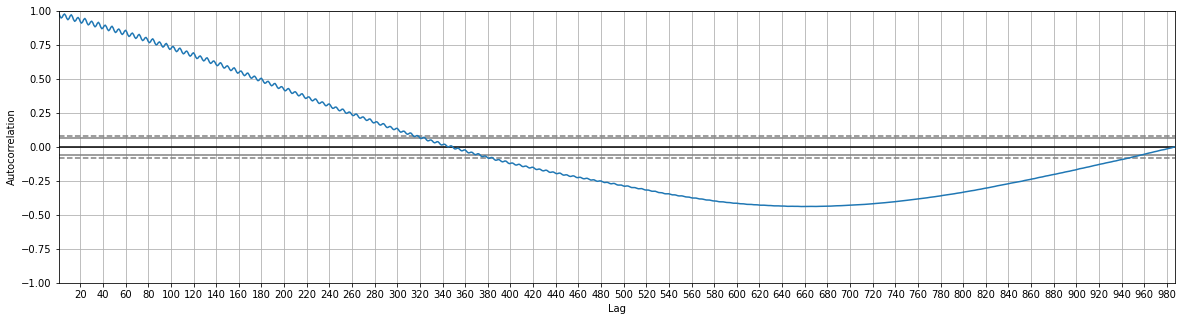

In [ ]:
# Для тех, кто остановился на рассмотрении всего графика было бы правильно сказать, что неприменимы функции минимума, максимумаб гистограммы и квантили. Корряцию смотреть не с чем - у нас только 1 столбец.
# Посмотрим автокорреляцию

plt.figure(figsize=[20,5])
pd.plotting.autocorrelation_plot(data['IPG2211A2N'])
plt.locator_params(axis='x', nbins=50)

# Здесь никакой сезонности не наблюдается

In [ ]:
# Уровень номер 2: отрезать данные старые (допустим с 2010 года) и рассмотреть этот участок более подробно

In [ ]:
data2010 = data[data['observation_date'].dt.year >= 2010]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

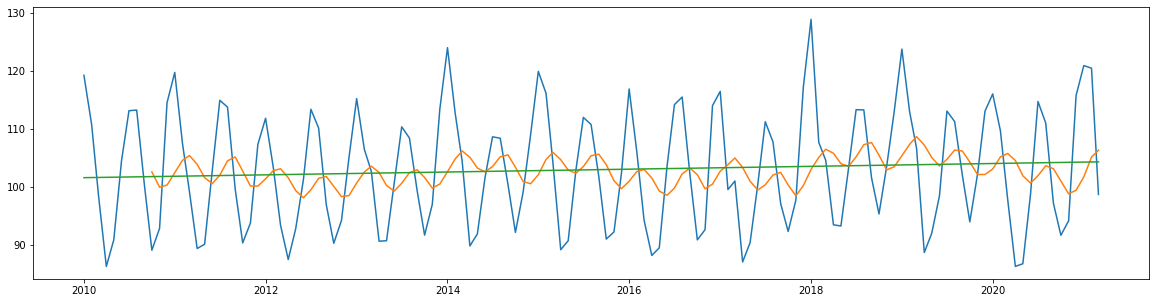

In [ ]:
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(data2010.index)
y = data2010['IPG2211A2N']


model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

data2010['min'] = data2010['IPG2211A2N'].min()
data2010['max'] = data2010['IPG2211A2N'].max()
data2010['mean'] = data2010['IPG2211A2N'].mean()
plt.figure(figsize=(20, 5))
plt.plot(data2010['observation_date'], data2010['IPG2211A2N'])
# plt.plot(data['observation_date'], data['mean'])
# plt.plot(data['observation_date'], data['min'])
# plt.plot(data['observation_date'], data['max'])
plt.plot(data2010['observation_date'], data2010['IPG2211A2N'].rolling(10).mean())
plt.plot(data2010['observation_date'], trend)

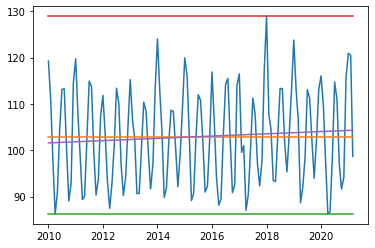

In [ ]:
plt.plot(data2010['observation_date'], data2010['IPG2211A2N'])
plt.plot(data2010['observation_date'], data2010['mean'])
plt.plot(data2010['observation_date'], data2010['min'])
plt.plot(data2010['observation_date'], data2010['max'])
# plt.plot(data2010['observation_date'], data2010['IPG2211A2N'].rolling(10).mean())
plt.plot(data2010['observation_date'], trend)

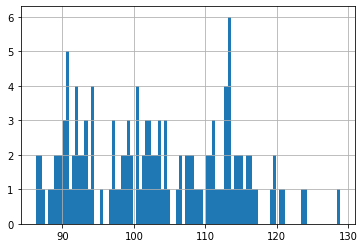

In [ ]:
data2010['IPG2211A2N'].hist(bins=100)

In [ ]:
# После отсечения нерелевантной истории становятся применимы максимум, среднее, квантили, гистограмма и все те методы, которые были разобраны на 2-м вебинаре

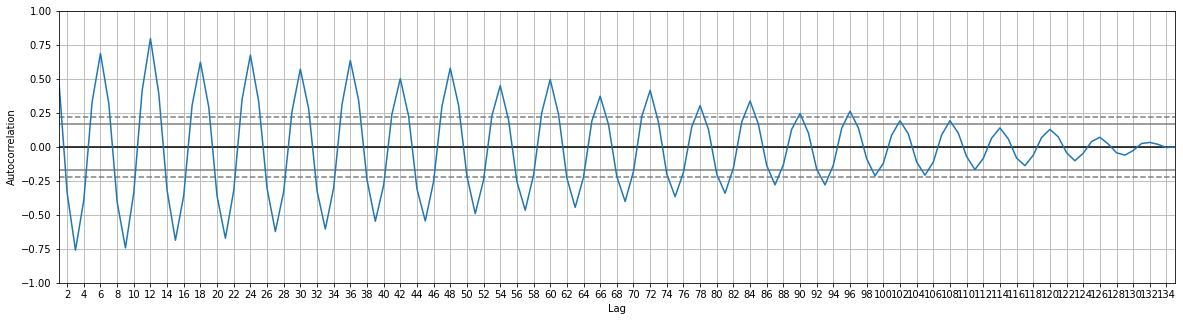

In [ ]:
plt.figure(figsize=[20,5])
pd.plotting.autocorrelation_plot(data2010['IPG2211A2N'])
plt.locator_params(axis='x', nbins=100)

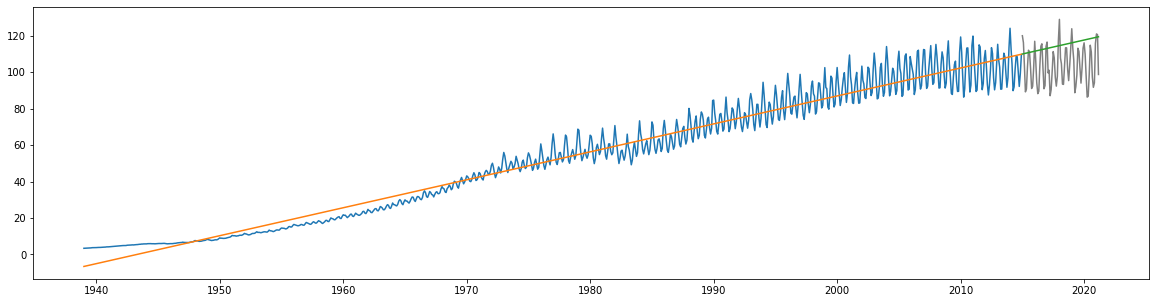

In [ ]:
# Построим прогнозную модель
data_train = data[data['observation_date'].dt.year < 2015]
data_test = data[data['observation_date'].dt.year >= 2015]

X_train = pd.DataFrame(data_train.index)
y_train = data_train['IPG2211A2N']

X_test = pd.DataFrame(data_test.index)
y_test = data_test['IPG2211A2N']

model.fit(X_train, y_train)
history_trend = model.predict(X_train)
future_trend = model.predict(X_test)


plt.figure(figsize=(20, 5))
plt.plot(data_train['observation_date'], data_train['IPG2211A2N'])
plt.plot(data_train['observation_date'], history_trend)
plt.plot(data_test['observation_date'], data_test['IPG2211A2N'], color='gray')
plt.plot(data_test['observation_date'], future_trend)

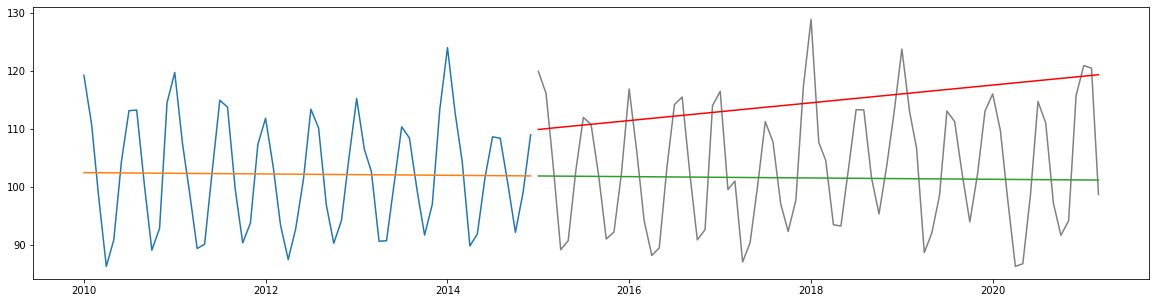

In [ ]:
# Построим прогнозную модель
data2010_train = data2010[data2010['observation_date'].dt.year < 2015]
data2010_test = data2010[data2010['observation_date'].dt.year >= 2015]

X_train2010 = pd.DataFrame(data2010_train.index)
y_train2010 = data2010_train['IPG2211A2N']

X_test2010 = pd.DataFrame(data2010_test.index)
y_test2010 = data2010_test['IPG2211A2N']

model.fit(X_train2010, y_train2010)
history_trend2010 = model.predict(X_train2010)
future_trend2010 = model.predict(X_test2010)


plt.figure(figsize=(20, 5))
plt.plot(data2010_train['observation_date'], data2010_train['IPG2211A2N'])
plt.plot(data2010_train['observation_date'], history_trend2010)
plt.plot(data2010_test['observation_date'], data2010_test['IPG2211A2N'], color='gray')
plt.plot(data2010_test['observation_date'], future_trend2010)
plt.plot(data_test['observation_date'], future_trend, color='red')

In [ ]:
data2010

,observation_date,IPG2211A2N,min,max,mean
852,2010-01-01,119.2473,86.2612,128.9071,102.947155
853,2010-02-01,110.7525,86.2612,128.9071,102.947155
854,2010-03-01,98.3430,86.2612,128.9071,102.947155
855,2010-04-01,86.2612,86.2612,128.9071,102.947155
856,2010-05-01,90.8459,86.2612,128.9071,102.947155
...,...,...,...,...,...
982,2020-11-01,94.1296,86.2612,128.9071,102.947155
983,2020-12-01,115.7566,86.2612,128.9071,102.947155
984,2021-01-01,120.9284,86.2612,128.9071,102.947155
985,2021-02-01,120.4768,86.2612,128.9071,102.947155


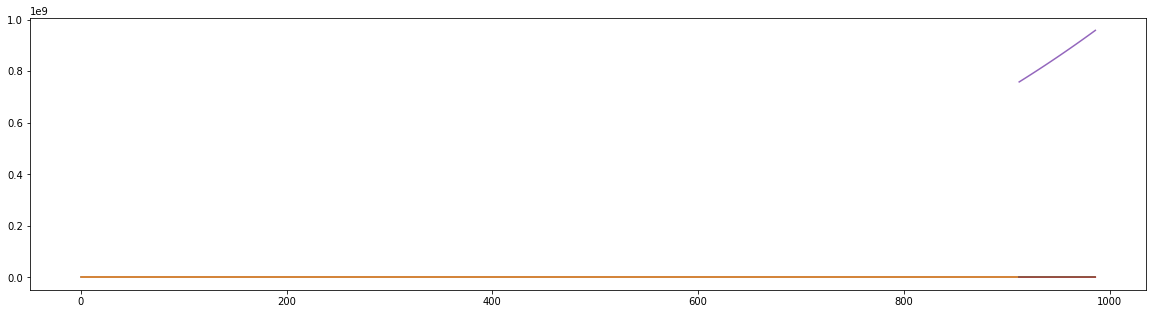

In [ ]:
# Полиномиальная регрессия 3 степени

# y = ax+b - линейная регрессия
# y = a1*x1 + a2*x^2 + a3*x^3 + b*1 - полиномиальная (тут полином 3 степени)

polydata = pd.DataFrame()
polydata['x'] = data.index
polydata['b'] = 1
polydata['x^2'] = polydata['x'] ** 2
polydata['x^3'] = polydata['x'] ** 3
polydata['observation_date'] = data['observation_date']

polydata_train = polydata[polydata['observation_date'].dt.year < 2015]
polydata_test = polydata[polydata['observation_date'].dt.year >= 2015]

polydataX_train = polydata_train[['x', 'x^2', 'x^3', 'b']]
polydatay_train = polydata_train['x']

polydataX_test = polydata_test[['x', 'x^2', 'x^3', 'b']]
polydatay_test = polydata_test['x']

model.fit(polydataX_train, polydatay_train)
polydata_history_trend = model.predict(polydataX_train)
polydata_future_trend = model.predict(polydataX_test)


plt.figure(figsize=(20, 5))
plt.plot(polydata_train.index, data_train['IPG2211A2N'])
plt.plot(polydata_train.index, polydata_history_trend)
plt.plot(polydatay_test.index, polydata_future_trend, color='gray')
plt.plot(polydatay_test.index, polydataX_test)

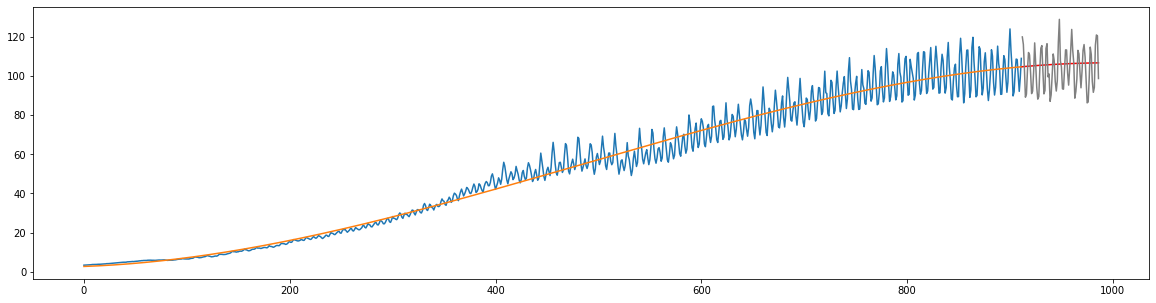

In [ ]:
# Исправленный код:

polydata = pd.DataFrame()
polydata['x'] = data.index
polydata['b'] = 1
polydata['x^2'] = polydata['x'] ** 2
polydata['x^3'] = polydata['x'] ** 3
polydata['observation_date'] = data['observation_date']
# fix 1: добавлены данные по индексу в таблицу
polydata['IPG2211A2N'] = data['IPG2211A2N']

polydata_train = polydata[polydata['observation_date'].dt.year < 2015]
polydata_test = polydata[polydata['observation_date'].dt.year >= 2015]

polydataX_train = polydata_train[['x', 'x^2', 'x^3', 'b']]
# fix 2: polydata_train['x'] -> polydata_train['IPG2211A2N']
polydatay_train = polydata_train['IPG2211A2N']

polydataX_test = polydata_test[['x', 'x^2', 'x^3', 'b']]
# fix 3: polydata_test['x'] -> polydata_test['IPG2211A2N']
polydatay_test = polydata_test['IPG2211A2N']

model.fit(polydataX_train, polydatay_train)
polydata_history_trend = model.predict(polydataX_train)
polydata_future_trend = model.predict(polydataX_test)


plt.figure(figsize=(20, 5))
# fix 4:
# plt.plot(polydata_train.index, data_train['IPG2211A2N'])
# plt.plot(polydata_train.index, polydata_history_trend)
# plt.plot(polydatay_test.index, polydata_future_trend, color='gray')
# plt.plot(polydatay_test.index, polydataX_test)
plt.plot(polydata_train.index, polydata_train['IPG2211A2N'])
plt.plot(polydata_train.index, polydata_history_trend)
plt.plot(polydatay_test.index, polydata_future_trend, color='red')
plt.plot(polydatay_test.index, polydata_test['IPG2211A2N'], color='gray')

In [ ]:
import numpy as np

poly_coef = np.polyfit(data_train.index, data_train['IPG2211A2N'], deg=3)

In [ ]:
poly_coef

array([-1.91172023e-07,  2.76443555e-04,  1.87143005e-02,  2.73754658e+00])

In [ ]:
polydata

,x,b,x^2,x^3,observation_date
0,0,1,0,0,1939-01-01
1,1,1,1,1,1939-02-01
2,2,1,4,8,1939-03-01
3,3,1,9,27,1939-04-01
4,4,1,16,64,1939-05-01
...,...,...,...,...,...
982,982,1,964324,946966168,2020-11-01
983,983,1,966289,949862087,2020-12-01
984,984,1,968256,952763904,2021-01-01
985,985,1,970225,955671625,2021-02-01


In [ ]:
# Код с вебинара - описка в номерах коэффициентов 0-1-1-0 вместо 0-1-2-3, из-за чего график ниже нужного
# data_res = polydata['x^3'] * poly_coef[0] + polydata['x^2'] * poly_coef[1] + polydata['x'] * poly_coef[1] + polydata['b'] * poly_coef[0]

# Правильные коэффициенты
data_res = polydata['x^3'] * poly_coef[0] + polydata['x^2'] * poly_coef[1] + polydata['x'] * poly_coef[2] + polydata['b'] * poly_coef[3]

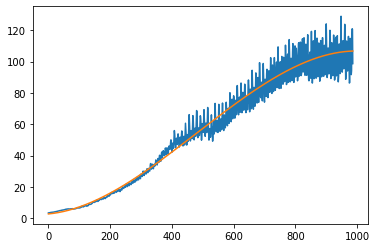

In [ ]:
plt.plot(data['IPG2211A2N'])
plt.plot(data_res)